# **Chapter 5. 머신러닝(Machine Learning) 기초** 





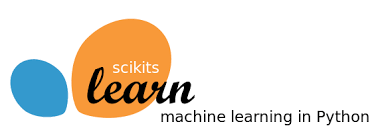


---
### **학습 목표**
> 5-1. 머신 러닝 개요 <br>
> 5-2. sklearn 이란? <br>
> 5-3. 전처리 기본 (정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할) <br>
> 5-4. 분류 분석 모델링 <br>
> 5-5. 분류 성능 평가하기 <br>
> 5-6. 회귀 분석 모델링 <br>
> **5-7. 회귀 성능 평가하기** <br>
> 5-8. 앙상블 모델링 <br>
> 5-9. 하이퍼파라미터(hyper-parameter) 튜닝 <br>
> 5-10. 비지도 군집화 분석

## 5-7. 회귀 성능 평가하기
> - 이번 시간에는 **회귀 모델이 얼마나 잘 학습되었는지 평가하는 방법**을 알아보겠습니다.
> - scikit-learn 에서는 다양한 회귀 성능 평가 지표를 제공합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

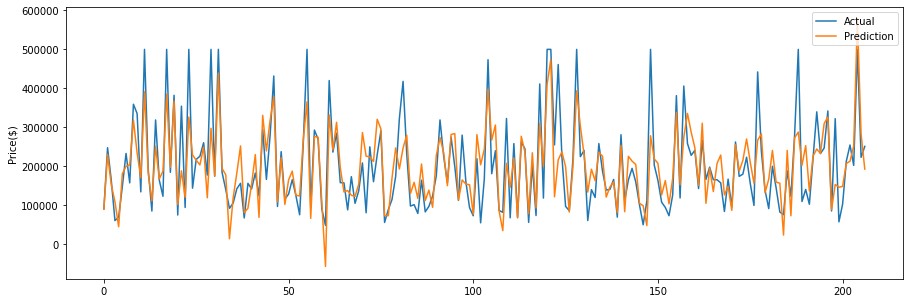

In [2]:
## 이전 강의에서 다룬 내용 (전처리, 모델 학습, 예측)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split    # 라이브러리 로딩
from sklearn.linear_model import LinearRegression

dataset = fetch_california_housing()
cal_house_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
cal_house_df['Price($)'] = dataset.target * 100000

X = cal_house_df.drop('Price($)', axis=1)  # 예측에 사용할 변수 
Y = cal_house_df['Price($)']               # 예측할 변수

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, shuffle=True)

# 다중 선형 회귀 모델 학습
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)

# 예측 결과 확인
predictions = mlr_model.predict(X_test)

# 예측 결과 시각화
Y_test = Y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('Price($)')
plt.show()

> ###  **5-7-1. MAE (Mean Absolute Error)**
> $$ MAE = \frac{\sum\vert y-\hat{y} \vert}{n}$$
> - MAE 는 **실제 값과 예측값의 차이의 전체 평균**입니다 (낮을 수록 좋은 지표).
> - 절대 값을 나타내기 때문에 **가장 직관적으로 오차를 알 수 있습니다.**
> - 예) 주택 가격 예측 모델은 평균적으로 실제 가격과 $1,000 오차를 보이고 있다!

> 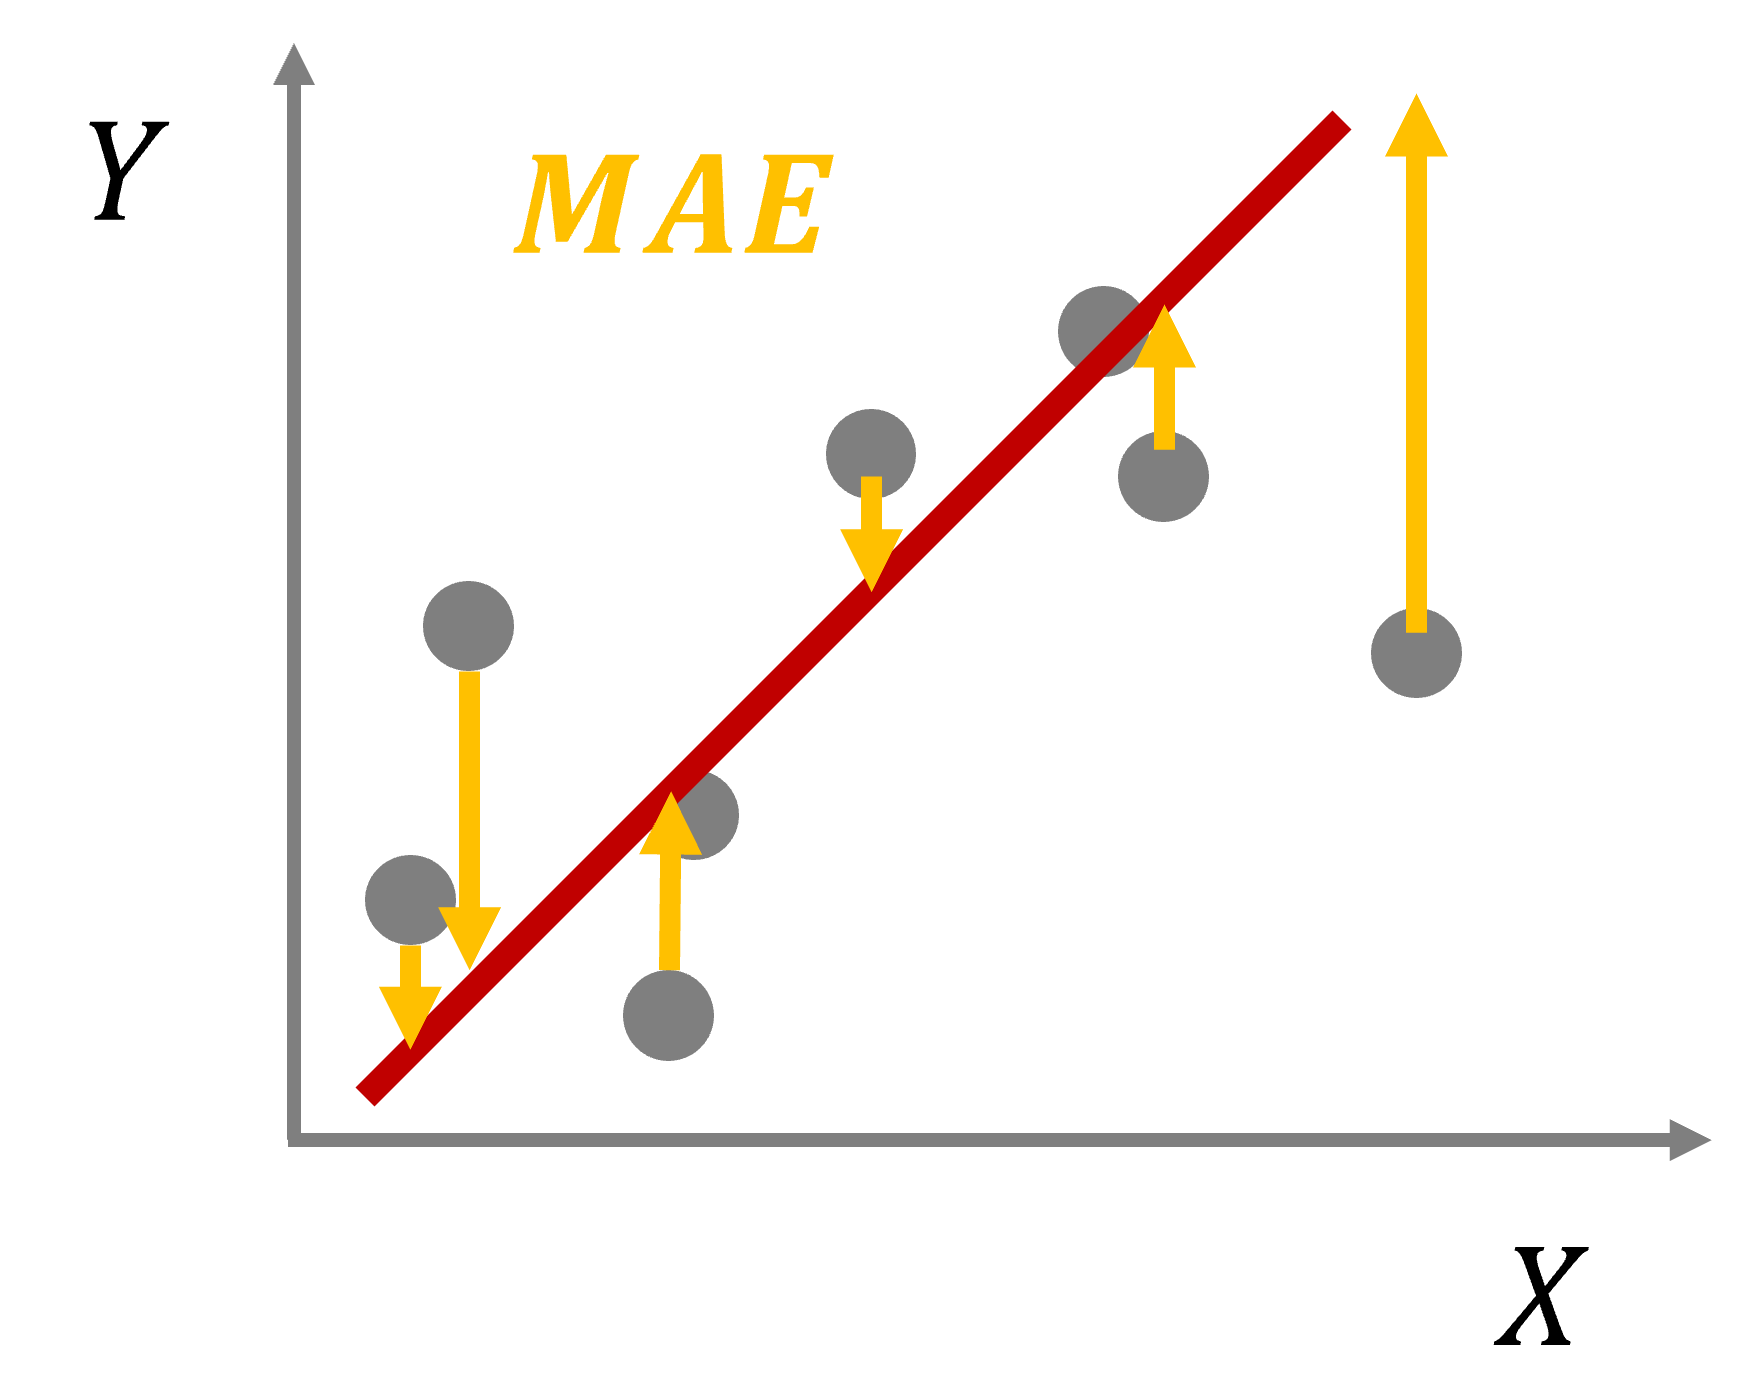

In [3]:
# 라이브러리 로딩
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, predictions)

In [4]:
mae

49654.413943920765

> ###  **5-7-2. MSE (Mean Squared Error) / RMSE (Root Mean Squared Error)**
> $$ MSE = \frac{\sum(y-\hat{y})^2}{n}$$
> $$ RMSE = \sqrt\frac{\sum(y-\hat{y})^2}{n}$$
> - MSE 는 실제값과 예측값의 차이를 제곱하기 때문에, 차이의 **면적합** 입니다.
> - 즉, 너무 못맞춘 예측값이 많을 수록 기하급수적으로 오차가 커집니다.
> - RMSE 는 MSE 에 루트(root) 를 씌운 지표로, **MSE 수치 보다 좀더 직관적**으로 확인할 수 있게 해줍니다.

> 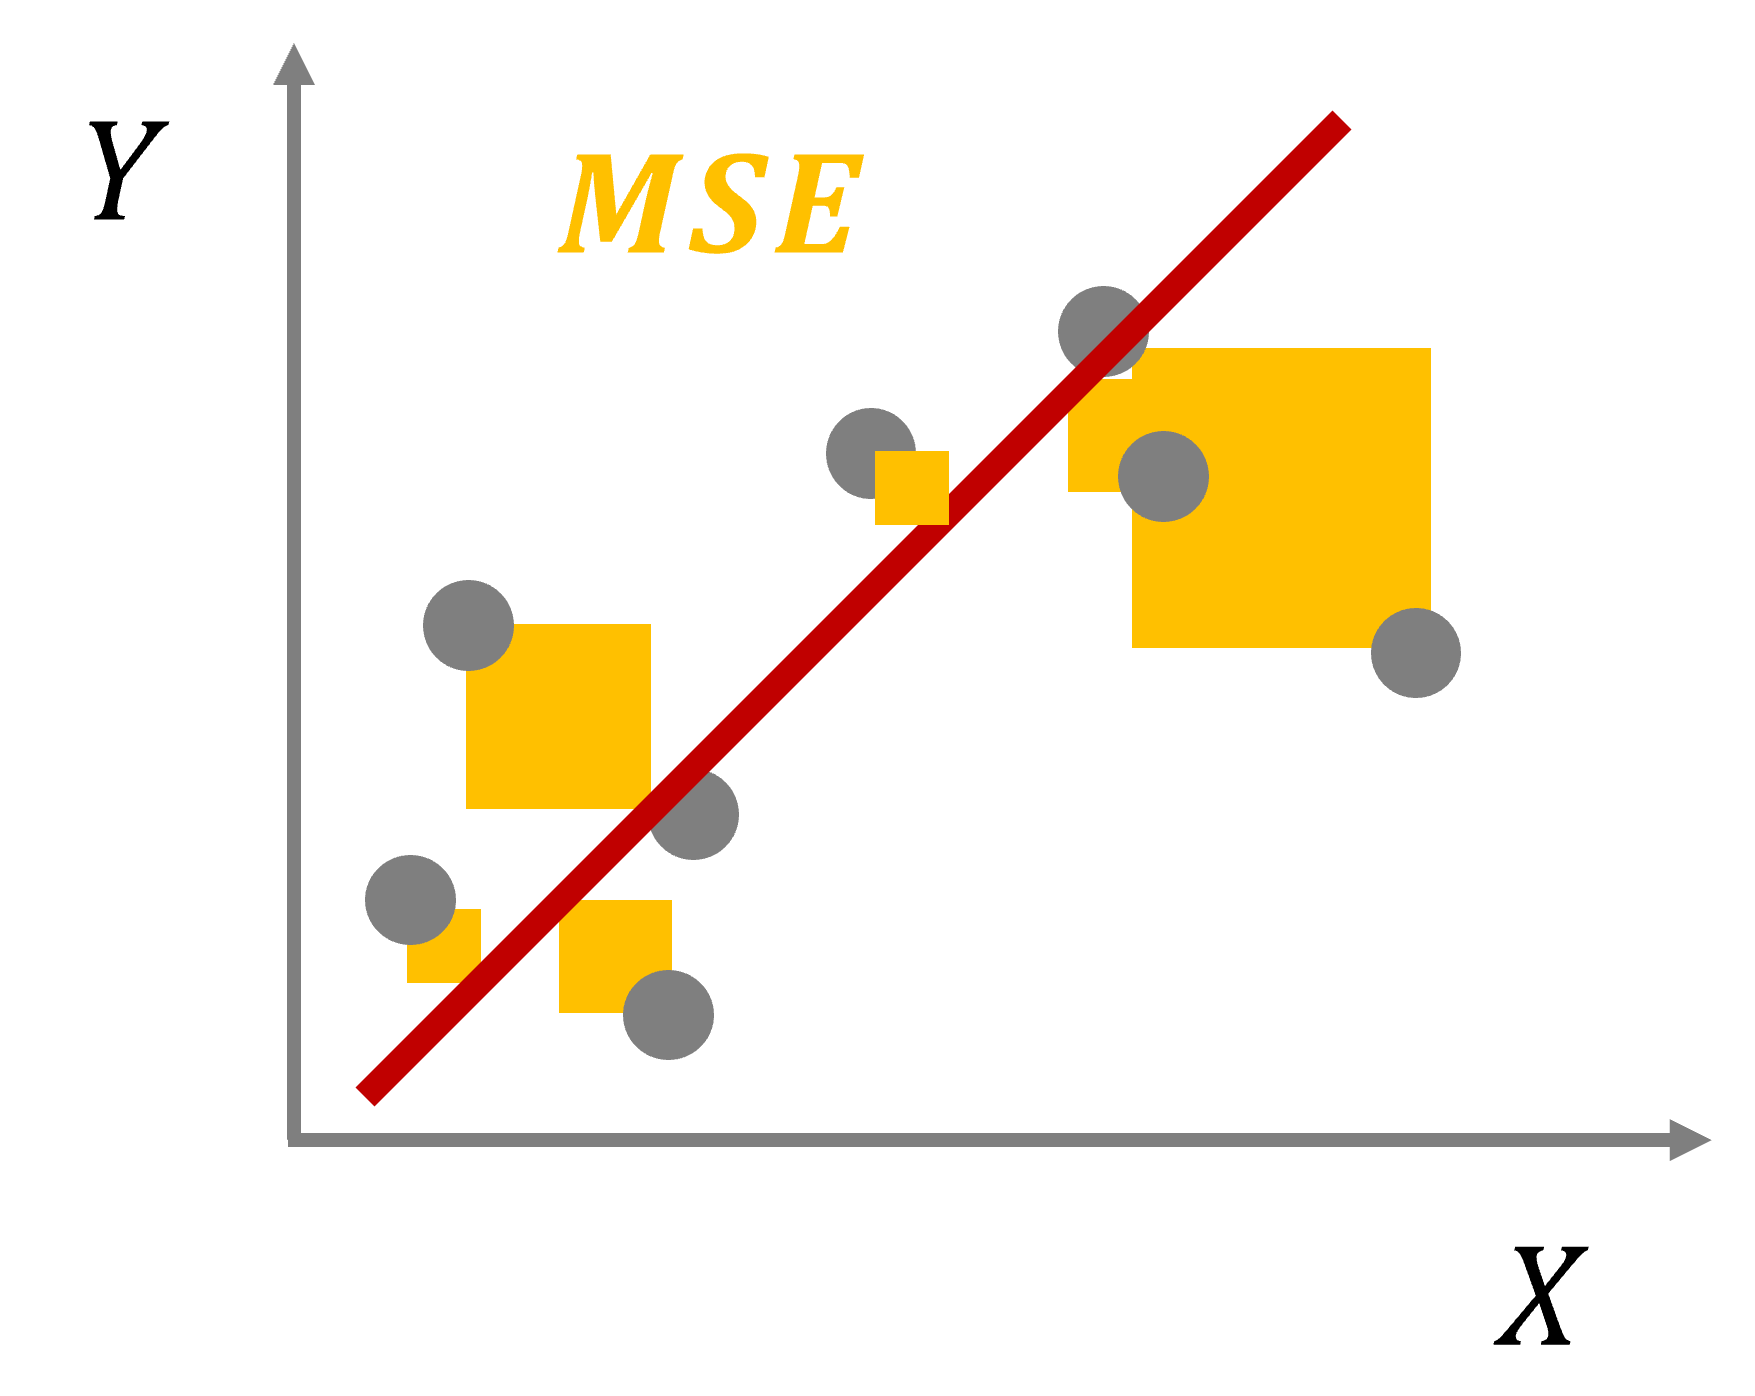

In [5]:
# 라이브러리 로딩
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predictions)

In [6]:
mse

4509230627.205338

In [7]:
rmse = mse ** 0.5

In [8]:
rmse

67150.80511211565

> ###  **5-7-3. R-squared (R<sup>2</sup>)**
> $$ R^2 = \frac{SSE}{SST}$$
> $$ SSE = \sum(\hat{y}-\bar{y})^2$$
> $$ SST = \sum(y-\bar{y})^2$$
> - R-squared 는 **회귀선이 실제 값에 얼마나 잘 적합되었는가?** 를 나타내는 지표입니다.
> - 실제 값과 실제 값 평균까지 거리를 계산한 뒤, 예측 값과 비교하는 과정을 거칩니다.
> - 0-1 사이의 값을 나타내며, **높을 수록 적합이 잘 되었다**는 의미입니다.
> - 즉, **회귀 선이 실제 값을 얼마나 잘 설명하는 선인가?** 의 의미를 가지고 있습니다.

In [9]:
# 라이브러리 로딩
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)

In [10]:
r2

0.6694478594039647

> ###  **5-7-4. Adjusted R-squared (R<sub>adj</sub><sup>2</sup>)**
> $$ R~adj^2 = 1-(1-R^2)\frac{n-1}{n-p-1}$$
> - 일반적으로 **회귀 모형의 적합도 (R<sup>2</sup>) 는 학습 변수가 많아질수록 높아지는 경향**이 있습니다.
> - 너무 적합도가 높다면 **과적합** 이 될 수 있습니다.
> - **과적합(Overfitting)** 또는 **과소 적합(Underfitting)** 은 머신 러닝에서 자주 등장하는 개념으로, 학습 모델이 적당한 적합도를 갖게 만드는 것이 매우 중요합니다!
> - 수정된 적합도 (Adjusted R-squared) 는 이런 **과적합 현상을 판단하기 위한 지표**입니다.
> - 학습에 사용된 변수 만큼 Penalty 를 부과해서, 적합도를 수정해줍니다.
> - 만약 **적합도 (R<sup>2</sup>) 가 높은데, 수정 된 적합도 (R<sub>adj</sub><sup>2</sup>) 가 현저하게 낮다면, 학습 모델이 과적합** 되었다고 판단합니다.

> 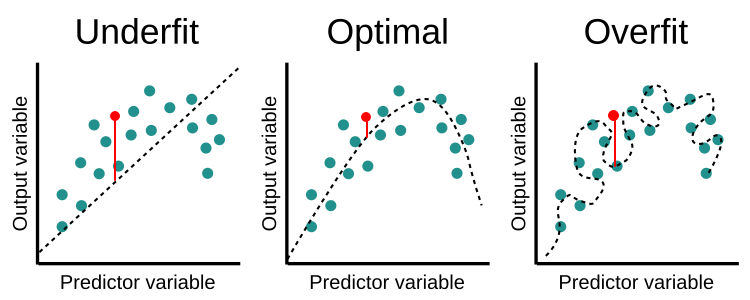

In [11]:
# 라이브러리 로딩
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)

In [13]:
# adjusted R-squared
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

In [14]:
adj_r2

0.6560922173596804

> **전체 회귀 모델 성능 지표**

In [15]:
print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 49654.41
MSE: 4509230627.21
RMSE: 67151
R2: 0.67
adj_R2: 0.66
